<a href="https://colab.research.google.com/github/allenpatrickargente/CPEN-21A-CPE-1-1/blob/main/Chapter_2_Lab_Exercise_1__Intro_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import numpy as np

housing_prepared = np.array([[0.5, 0.7], [0.8, 0.3], [0.2, 0.9]])  # Placeholder prepared feature matrix
housing_labels = np.array([10, 20, 30])  # Placeholder target labels

param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svm_reg = SVR()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid_search = GridSearchCV(svm_reg, param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

print('Best estimator =', grid_search.best_estimator_)

negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
print('Rmse = ',rmse)

best_params = grid_search.best_params_
print('Best Parameter =', grid_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, 

###2.	Try replacing GridSearchCV with RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

housing_prepared = np.array([[0.5, 0.7], [0.8, 0.3], [0.2, 0.9]])  # Placeholder prepared feature matrix
housing_labels = np.array([10, 20, 30])  # Placeholder target labels

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
}

svm_reg = SVR()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
random_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs, cv=cv, scoring='neg_mean_squared_error', n_iter=50, random_state=42, verbose=2)
random_search.fit(housing_prepared, housing_labels)

print('Best estimator =', random_search.best_estimator_)

negative_mse = random_search.best_score_
rmse = np.sqrt(-negative_mse)
print('RMSE =', rmse)

best_params = random_search.best_params_
print('Best parameters =', best_params)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   0.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

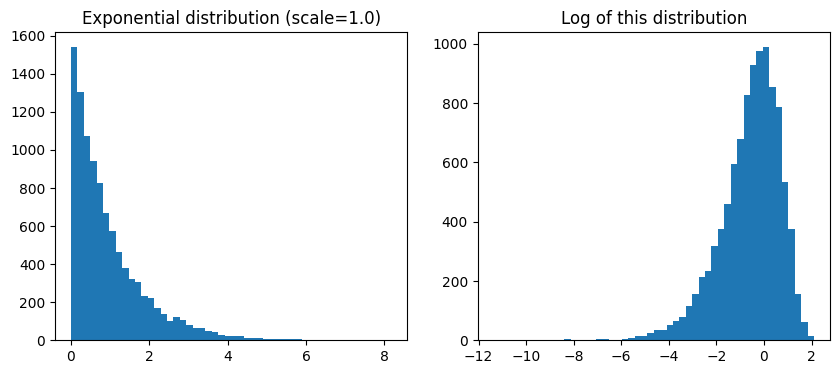

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import expon
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

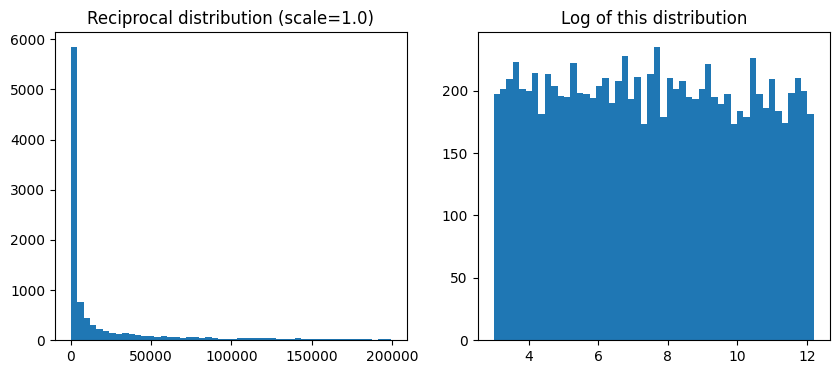

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

###3.	Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [ ]:
import numpy as np

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self

    def transform(self, X):
        return X[:, self.feature_indices_]

# Placeholder values for feature_importances and attributes
feature_importances = [ 0,  1,  7,  9, 12]
attributes = (['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'])

k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
print("Top", k, "feature indices:", top_k_feature_indices)
print("Top", k, "features:", np.array(attributes)[top_k_feature_indices])
print("Top", k, "feature importances:", sorted(zip(feature_importances, attributes), reverse=True)[:k])


Top 5 feature indices: [0 1 2 3 4]
Top 5 features: ['longitude' 'latitude' 'median_income' 'pop_per_hhold' 'INLAND']
Top 5 feature importances: [(12, 'INLAND'), (9, 'pop_per_hhold'), (7, 'median_income'), (1, 'latitude'), (0, 'longitude')]


###4.	Try creating a single pipeline that does the full data preparation plus the final prediction.

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])
prepare_select_and_predict_pipeline.fit(housing, housing_labels)
Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

###5.	Automatically explore some preparation options using GridSearchCV.

In [ ]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)